In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm

In [5]:
# os.chdir('Desktop/Project_1')
# os.getcwd()

In [6]:
train = pd.read_csv('Train_data.csv')
test = pd.read_csv('Test_data.csv')

In [7]:
train['area code'] = train['area code'].astype(object)

In [8]:
for i in range(train.shape[0]) :
    temp = train['phone number'][i].split('-')
    train['phone number'][i] = temp[0]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
for i in train.columns :
    if (train[i].dtypes == 'object')  :
        print(i)
        train[i] = pd.Categorical(train[i])
        train[i] = train[i].cat.codes

state
area code
phone number
international plan
voice mail plan
Churn


{'boxes': [<matplotlib.lines.Line2D at 0x111e5ea58>],
 'caps': [<matplotlib.lines.Line2D at 0x113c1a4a8>,
 'fliers': [<matplotlib.lines.Line2D at 0x113c21160>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x113c1acf8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x111e5eba8>,
  <matplotlib.lines.Line2D at 0x113c1a080>]}

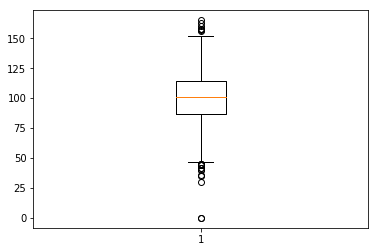

In [10]:
%matplotlib inline 
plt.boxplot(train['total day calls'])

In [11]:
cnames = ['account length','number vmail messages','total day minutes','total day calls','total day charge',
          'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
          'total night charge','total intl minutes','total intl calls','total intl charge',
          'number customer service calls']

In [12]:
for i in cnames :
    print(i)
    q75, q25 = np.percentile(train.loc[:,i], [75,25])
    iqr = q75 - q25
    
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    
    train = train.drop(train[train.loc[:,i] < min].index)
    train = train.drop(train[train.loc[:,i] > max].index)

account length
number vmail messages
total day minutes
total day calls
total day charge
total eve minutes
total eve calls
total eve charge
total night minutes
total night calls
total night charge
total intl minutes
total intl calls
total intl charge
number customer service calls


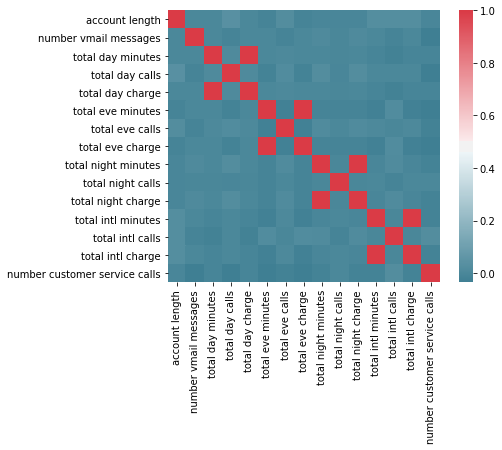

In [13]:
df_corr = train.loc[:,cnames]
f, ax = plt.subplots(figsize = (7,5))
corr = df_corr.corr()

sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), cmap = sns.diverging_palette(220,10,as_cmap = True),
           square = True, ax = ax)

In [14]:
cat_names = ['state','area code','phone number','international plan','voice mail plan']

for i in cat_names :
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(train['Churn'],train[i]))
    print(p)

state
0.020743472994456533
area code
0.6971762915961732
phone number
0.44909370301756946
international plan
1.6860769270699622e-53
voice mail plan
2.6438944498671704e-07


In [15]:
train = train.drop(['area code', 'phone number','total day minutes','total eve minutes',
                   'total night minutes', 'total intl minutes'], axis = 1)

(array([ 15.,  29.,  27.,  46.,  59.,  75.,  82., 126., 150., 175., 175.,
        200., 218., 189., 200., 189., 194., 141., 128., 108.,  67.,  72.,
         40.,  37.,  24.,  22.,   9.]),
 array([  1.        ,   8.55555556,  16.11111111,  23.66666667,
         31.22222222,  38.77777778,  46.33333333,  53.88888889,
         61.44444444,  69.        ,  76.55555556,  84.11111111,
         91.66666667,  99.22222222, 106.77777778, 114.33333333,
        121.88888889, 129.44444444, 137.        , 144.55555556,
        152.11111111, 159.66666667, 167.22222222, 174.77777778,
        182.33333333, 189.88888889, 197.44444444, 205.        ]),
 <a list of 27 Patch objects>)

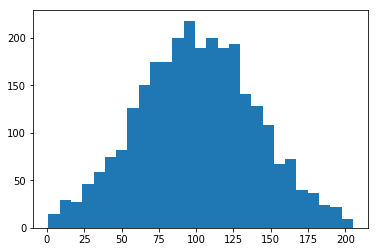

In [16]:
%matplotlib inline
plt.hist(train['account length'], bins = 'auto')

In [17]:
cnames = ['account length', 'number vmail messages', 'total day calls', 'total day charge',
       'total eve calls', 'total eve charge', 'total night calls',
       'total night charge', 'total intl calls', 'total intl charge',
       'number customer service calls']

In [18]:
for i in cnames :
    train[i] = (train[i] - train[i].min())/(train[i].max() - train[i].min())

In [19]:
test['area code'] = test['area code'].astype(object)
for i in range(test.shape[0]) :
    temp = test['phone number'][i].split('-')
    test['phone number'][i] = temp[0]

for i in test.columns :
    if (test[i].dtypes == 'object')  :
        print(i)
        test[i] = pd.Categorical(test[i])
        test[i] = test[i].cat.codes
test = test.drop(['area code', 'phone number','total day minutes','total eve minutes',
                   'total night minutes', 'total intl minutes'], axis = 1)
cnames = ['account length', 'number vmail messages', 'total day calls', 'total day charge',
       'total eve calls', 'total eve charge', 'total night calls',
       'total night charge', 'total intl calls', 'total intl charge',
       'number customer service calls']
for i in cnames :
    test[i] = (test[i] - test[i].min())/(test[i].max() - test[i].min())

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


state
area code
phone number
international plan
voice mail plan
Churn


In [20]:
train['Churn'] = train['Churn'].replace(1,'yes')
train['Churn'] = train['Churn'].replace(0,'no')

x_train = train.values[:,0:14]
y_train = train.values[:,14]

In [21]:
test['Churn'] = test['Churn'].replace(1,'yes')
test['Churn'] = test['Churn'].replace(0,'no')

x_test = test.values[:,0:14]
y_test = test.values[:,14]

In [22]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy').fit(x_train,y_train)
# clf = tree.DecisionTreeClassifier(criterion = 'gini').fit(x_train,y_train)
dt_pred = clf.predict(x_test)
CM = pd.crosstab(y_test,dt_pred)
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

CM
(FN*100)/(FN+TP)
accuracy_score(y_test,dt_pred)*100

89.02219556088782

In [23]:
knn_model = KNeighborsClassifier(n_neighbors = 1).fit(x_train,y_train)
knn_pred = knn_model.predict(x_test)

CM = pd.crosstab(y_test,knn_pred)
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

CM
(FN*100)/(FN+TP)
#accuracy_score(y_test,knn_pred)*100

76.33928571428571

In [24]:
nb_model = GaussianNB().fit(x_train,y_train)
nb_pred = nb_model.predict(x_test)


CM = pd.crosstab(y_test,nb_pred)
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

(FN*100)/(FN+TP)

#accuracy_score(y_test,nb_pred)*100

69.64285714285714

In [25]:
rf_model = RandomForestClassifier(n_estimators = 100).fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)

CM = pd.crosstab(y_test,nb_pred)
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

(FN*100)/(FN+TP)
accuracy_score(y_test,nb_pred)*100

85.78284343131374

In [26]:
train['Churn'] = train['Churn'].replace('no',0)
train['Churn'] = train['Churn'].replace('yes',1)

train_logit = pd.DataFrame(train['Churn'])
test_logit = pd.DataFrame(test['Churn'])

cnames = ['account length','number vmail messages','total day calls','total day charge',
          'total eve calls','total eve charge','total night calls',
          'total night charge','total intl calls','total intl charge',
          'number customer service calls']
train_logit = train_logit.join(train[cnames])
test_logit = test_logit.join(test[cnames])

cat_names = ['state','international plan', 'voice mail plan']
for i in cat_names :
    temp = pd.get_dummies(train[i], prefix = i)
    train_logit = train_logit.join(temp)
    temp = pd.get_dummies(test[i], prefix = i)
    test_logit = test_logit.join(temp)

train_cols = train.columns[0:14]
test_cols = test.columns[0:14]

logit = sm.Logit(train['Churn'],train[train_cols]).fit()

test['predict_prob'] = logit.predict(test[test_cols])
test['predict_val'] = 1
test.loc[test.predict_prob < 0.5, 'predict_val'] = 0

CM = pd.crosstab(test['Churn'],test['predict_val'])
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

(FN*100)/(FN+TP)
#accuracy_score(y_test,nb_pred)*100

Optimization terminated successfully.
         Current function value: 0.286275
         Iterations 8


82.58928571428571

In [27]:
test['knn_pred'] = knn_pred
test['nb_pred'] = nb_pred
test['rf_pred'] = rf_pred
test['dt_pred'] = dt_pred
test.to_csv('Example_Output_Python.csv')